<a href="https://colab.research.google.com/github/mamathabhukya/credit-card-approvals-project/blob/main/Bank_Credit_card_Approvals_project_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**


Numerous online lending platforms have emerged in recent times, offering loan opportunities to businesses, similar to banks. However, they are also faced with the risk of user loan default, which is correlated to the sustainability and healthy development of the platforms.


 The importance of calculating and predicting credit risks cannot be overemphasised. Evaluating an individual’s financial information and historical data is pivotal to predicting whether he/she would default on a loan or not.

Credit score cards are a common risk control method in the financial industry. It uses personal information, and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank or lending company is able to decide whether to issue a credit card to the applicant or not. Credit scores can objectively quantify the magnitude of risk. The project will focus on predicting whether an applicant is qualified to receive a loan or not.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**Introduction to the Dataset**

We'll use the Credit Card Approval dataset from the UCI Machine Learning Repository. This data is confidential and so the contributor of the dataset anonymized the feature names. The work flow of this notebook is as follows:

First, we will start by loading and viewing the dataset.

1.   First, we will start by loading and viewing the dataset.

2.   We will see that the dataset has both numerical and non-numerical features and that it contains a number of missing entries.

3.We will then take care of the missing values.

4.After we have cleaned and prepared our data, we will do some exploratory data analysis to improve our understanding.



5.We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.
  
  
6.Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be approved.


The features of this dataset have been anonymized to protect the privacy, but this blog gives us a pretty good overview of the probable features.

The probable features in a typical credit card application are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income and finally the ApprovalStatus.

In [12]:
credit_card_app = pd.read_csv('/content/clean_dataset.csv', header=None)
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       691 non-null    object
 1   1       691 non-null    object
 2   2       691 non-null    object
 3   3       691 non-null    object
 4   4       691 non-null    object
 5   5       691 non-null    object
 6   6       691 non-null    object
 7   7       691 non-null    object
 8   8       691 non-null    object
 9   9       691 non-null    object
 10  10      691 non-null    object
 11  11      691 non-null    object
 12  12      691 non-null    object
 13  13      691 non-null    object
 14  14      691 non-null    object
 15  15      691 non-null    object
dtypes: object(16)
memory usage: 86.5+ KB


In [13]:
#Display first few rows
credit_card_app.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
1,1,30.83,0.0,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,00202,0,1
2,0,58.67,4.46,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,00043,560,1
3,0,24.5,0.5,1,1,Materials,Black,1.5,1,0,0,0,ByBirth,00280,824,1
4,1,27.83,1.54,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,00100,3,1


The missing values repreented with '?' have all been replaced with NaN

In [14]:
#full description of the dataset
credit_card_app.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691
unique,3,351,216,3,3,15,6,133,3,3,24,3,4,171,241,3
top,1,28.46,1.5,1,1,Energy,White,0.0,1,0,0,0,ByBirth,00000,0,0
freq,480,12,21,525,527,146,408,70,361,395,395,374,625,145,295,383


In [16]:
credit_card_app.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

The column containing missing values are categorical columns that could not be filled with mean inputation. To fix this, we are going to use mode inputation method.

In [17]:
credit_card_app.fillna(credit_card_app.mean(), inplace = True)

<ipython-input-17-965efcab95fd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit_card_app.fillna(credit_card_app.mean(), inplace = True)


In [18]:
#iterating over each column of the dataset
for col in credit_card_app:
    #check if any column is categorical (object)
    if credit_card_app[col].dtype == 'object':
        #if colmn is categorical, input missing vales with the most frequent value
        credit_card_app = credit_card_app.fillna(credit_card_app[col].value_counts().index[0])

In [19]:
#check to see if there are stll missing values
credit_card_app.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

**Renaming the columns**

In [20]:
d = {0: 'Gender', 1: 'Age', 2: 'Debt', 3: 'Married', 4: 'BankCustomer', 5: 'EducationLevel', 6: 'Ethnicity', 7: 'YearsEmployed', 8: 'PriorDefault',
9: 'Employed', 10: 'CreditScore', 11: 'DriversLicense', 12: 'Citizen', 13: 'ZipCode', 14:'Income', 15: 'ApprovalStatus' }

credit_card_app.rename(columns = d, inplace = True)
credit_card_app.describe(include = 'all')

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691,691
unique,3,351,216,3,3,15,6,133,3,3,24,3,4,171,241,3
top,1,28.46,1.5,1,1,Energy,White,0.0,1,0,0,0,ByBirth,00000,0,0
freq,480,12,21,525,527,146,408,70,361,395,395,374,625,145,295,383


In [21]:
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          691 non-null    object
 1   Age             691 non-null    object
 2   Debt            691 non-null    object
 3   Married         691 non-null    object
 4   BankCustomer    691 non-null    object
 5   EducationLevel  691 non-null    object
 6   Ethnicity       691 non-null    object
 7   YearsEmployed   691 non-null    object
 8   PriorDefault    691 non-null    object
 9   Employed        691 non-null    object
 10  CreditScore     691 non-null    object
 11  DriversLicense  691 non-null    object
 12  Citizen         691 non-null    object
 13  ZipCode         691 non-null    object
 14  Income          691 non-null    object
 15  ApprovalStatus  691 non-null    object
dtypes: object(16)
memory usage: 86.5+ KB


DATA ANALYSIS


1. Univariate Analysis


2. Bivariate Analysis


3. Correlation Plot


UNIVARIATE ANALYSIS

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, 'Approved')])

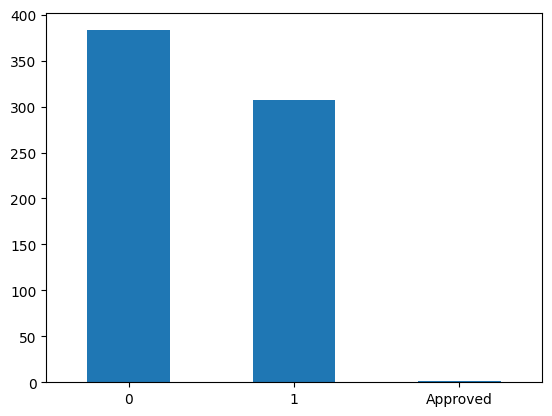

In [22]:
# Check the noise and biasness in the target column
credit_card_app['ApprovalStatus'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

The chart above shows that there is little noise in the target column, whuch means it is not biased.

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '0'), Text(2, 0, 'Gender')])

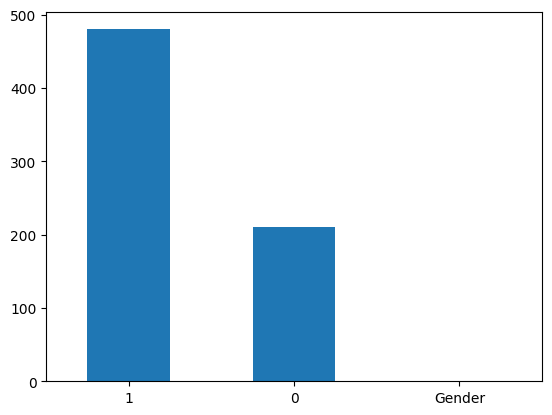

In [23]:
# Check which of the gender applied more for the credit card
credit_card_app['Gender'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

The chart above shows that Gender_b applied more than Gender_a

(array([0, 1, 2]),
 [Text(0, 0, '1'), Text(1, 0, '0'), Text(2, 0, 'BankCustomer')])

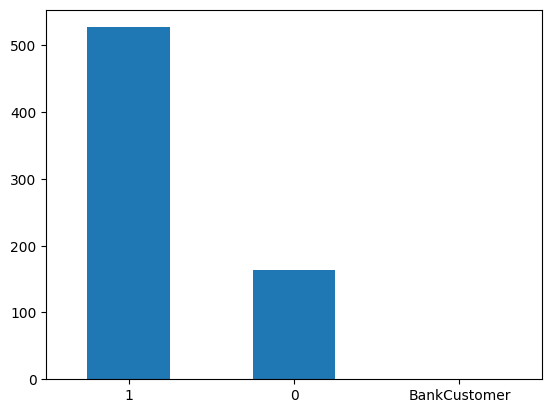

In [24]:
# Check which category of BankCustomers apllied more for the creditcard
credit_card_app['BankCustomer'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

BankCustomers of category_g apllied more for creditcard, those of category_p aplled less for creditcard and Customers of category_gg was almost is insignificant


Here, we have an hypothesis that category_gg is an oultlier and should probably be removed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Energy'),
  Text(1, 0, 'Materials'),
  Text(2, 0, 'Industrials'),
  Text(3, 0, 'ConsumerDiscretionary'),
  Text(4, 0, 'ConsumerStaples'),
  Text(5, 0, 'Healthcare'),
  Text(6, 0, 'Financials'),
  Text(7, 0, 'InformationTechnology'),
  Text(8, 0, 'CommunicationServices'),
  Text(9, 0, 'Utilities'),
  Text(10, 0, 'Real Estate'),
  Text(11, 0, 'Education'),
  Text(12, 0, 'Research'),
  Text(13, 0, 'Transport'),
  Text(14, 0, 'Industry')])

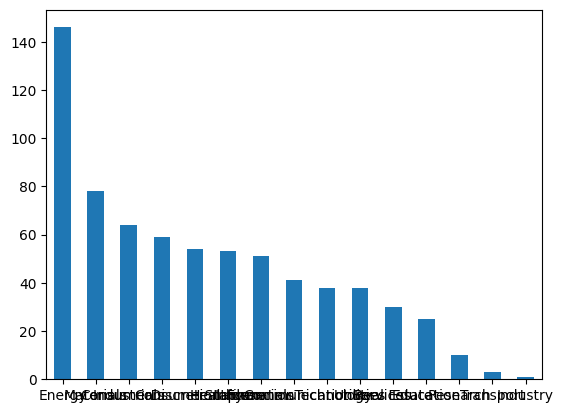

In [25]:
# Check for the educational level of applicants
credit_card_app['EducationLevel'].value_counts().plot(kind= 'bar')

plt.xticks(rotation= 0)

BIVARIATE ANALYSIS


The following columns were given top priority based on the information gotten with the dataset [prior default, years employed, credit score and income level]

<Figure size 1000x700 with 0 Axes>

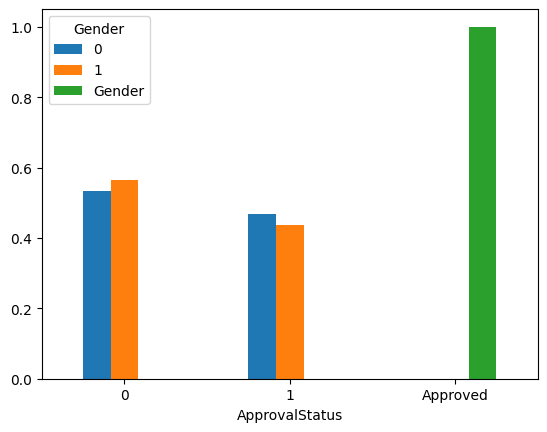

<Figure size 1000x700 with 0 Axes>

In [27]:
# Check the relationship between gender and approval status
gender = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['Gender'])
gender.div(gender.sum().astype(float), axis=1).plot(kind='bar', stacked=False)



plt.xticks(rotation= 0)
plt.figure(figsize= (10,7))

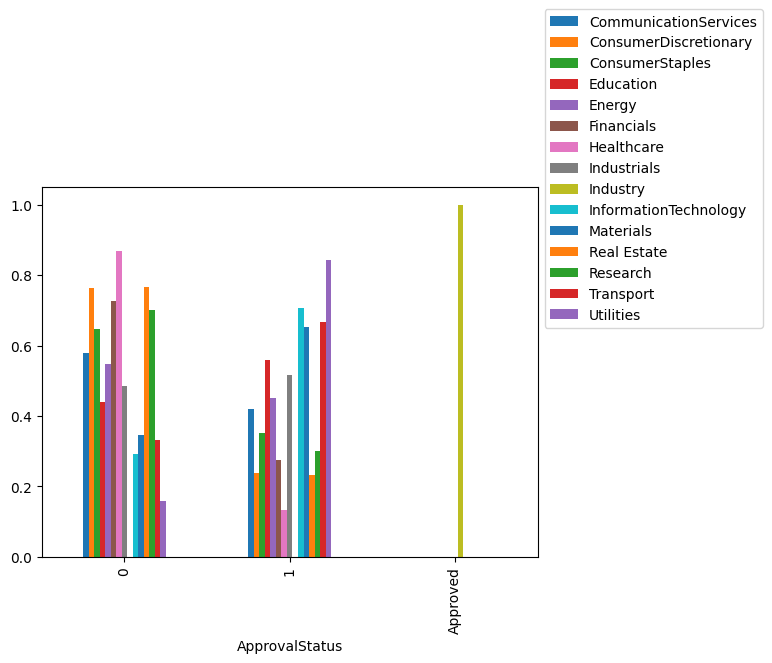

In [28]:
# Check relationship between educationlevel and approved status
education = pd.crosstab(credit_card_app['ApprovalStatus'], credit_card_app['EducationLevel'])
education
education.div(education.sum(0).astype(float), axis=1).plot(kind='bar', stacked=False)

plt.legend(bbox_to_anchor= (1,1.5))

The following columns has a high correlation with the target variable


PriorDefault


CreditScore


Citizen


**Preprocessing the Data**

In [31]:
def Encoder(credit_card_app):
    to_encode = list(credit_card_app.select_dtypes(include = ['category', 'object']))

    #created a LabelEncoder object
    enc = LabelEncoder()

    for col in to_encode:
        try:
            credit_card_app[col] = enc.fit_transform(credit_card_app[col])
        except:
            print("Error while encoding " + col)

    return credit_card_app

In [32]:
#Convert the data into numerical data
credit_card_app = Encoder(credit_card_app)

In [33]:
#Check to see if the conversion is successful
credit_card_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Gender          691 non-null    int64
 1   Age             691 non-null    int64
 2   Debt            691 non-null    int64
 3   Married         691 non-null    int64
 4   BankCustomer    691 non-null    int64
 5   EducationLevel  691 non-null    int64
 6   Ethnicity       691 non-null    int64
 7   YearsEmployed   691 non-null    int64
 8   PriorDefault    691 non-null    int64
 9   Employed        691 non-null    int64
 10  CreditScore     691 non-null    int64
 11  DriversLicense  691 non-null    int64
 12  Citizen         691 non-null    int64
 13  ZipCode         691 non-null    int64
 14  Income          691 non-null    int64
 15  ApprovalStatus  691 non-null    int64
dtypes: int64(16)
memory usage: 86.5 KB


In [34]:
credit_card_app.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,2,350,215,2,2,8,2,132,2,2,23,2,2,170,240,2
1,1,157,0,1,1,7,5,30,1,1,1,0,0,68,0,1
2,0,329,158,1,1,10,1,83,1,1,18,0,0,11,185,1
3,0,89,16,1,1,10,1,36,1,0,0,0,0,96,224,1
4,1,125,46,1,1,7,5,91,1,1,17,1,0,31,124,1


**Splitting data into training and testing**

In [35]:
#Assigning the features to X and target column  to Y.
X = credit_card_app.iloc[:,0:15]
Y = credit_card_app.iloc[:,15]
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,2,350,215,2,2,8,2,132,2,2,23,2,2,170,240
1,1,157,0,1,1,7,5,30,1,1,1,0,0,68,0
2,0,329,158,1,1,10,1,83,1,1,18,0,0,11,185
3,0,89,16,1,1,10,1,36,1,0,0,0,0,96,224
4,1,125,46,1,1,7,5,91,1,1,17,1,0,31,124


In [36]:
# To understand the feature importance of the attributes
# check for feature Importance

from sklearn.ensemble import ExtraTreesRegressor
Extreg_model = ExtraTreesRegressor()
Extreg_model.fit(X,Y)

ExtraTreesRegressor()

In [37]:
print(Extreg_model.feature_importances_)

[0.01806083 0.05042818 0.05336824 0.01289826 0.01169384 0.04549199
 0.02666948 0.05706123 0.43383609 0.08305122 0.06091472 0.01888717
 0.02423001 0.06282435 0.0405844 ]


In [38]:
# Splitting the dataset into training and testing with a test size of 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

The total dataset here is split into training dataset and testing dataset with the size 0.3 for testing dataset. Random state was used for reproduceability.

**Scaling data to fit ML model**

In [39]:
# Importing MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

Fitting a Logistic Regression model to the train dataset

In [40]:
#import the logistic regression model to train the dataset
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier
logreg = LogisticRegression(random_state=0)
logreg.fit(rescaled_X_train, y_train)

LogisticRegression(random_state=0)

**Prediction and Performance Evaluation**

In [41]:
# Using the predict function to predict the rescaled_X_test

logreg_prediction = logreg.predict(rescaled_X_test)

In [42]:
# Importing Confusion matrix and accuracy score to evaluate the performance of the model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

matrix = confusion_matrix(y_test, logreg_prediction)
print(matrix)

[[89 16  0]
 [13 89  0]
 [ 0  1  0]]


In [46]:
accuracy_score(y_test, logreg_prediction)*100




85.57692307692307

**Feature selection**

Lets select the relevant features that affect the target variable most and see if the model will improve

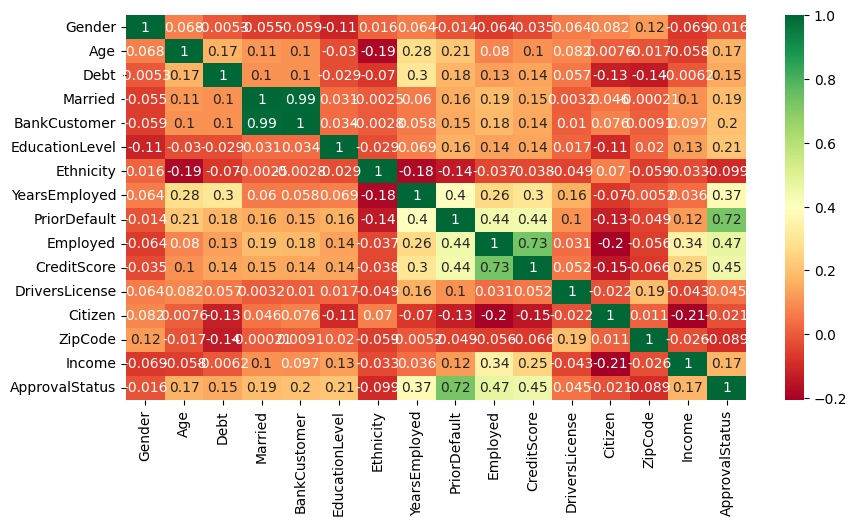

In [48]:
#get correlations of each features in dataset
corrmat = credit_card_app.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(credit_card_app[top_corr_features].corr(),annot=True,cmap="RdYlGn")